### Aprendizaje automático 
Segundo trabajo práctico
<br>Máster en Ingeniería Informática - Universidad de Sevilla
<br>Curso 2021-22

APELLIDOS: Fernández de Bobadilla Brioso
<br>NOMBRE: Guiomar

In [27]:
import pandas as pd
features = ['day','month','year','Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
#dateParser = lambda x,y,z: z+'/'+y+'/'+x
#convertClass = lambda x: 1 if x.strip() == 'fire' else 0
#convertStrFloat = lambda x: float(x)
#converters={'FWI': convertStrFloat, 'DC': convertStrFloat, 'Classes' : convertClass}
#converters={'Classes' : convertClass}
#parse_dates= {"Date" : ["year","month","day"]}, date_parser = dateParser, converters = converters
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=0, names = features, skiprows = [0,124,125,126])
#dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset = dataset[dataset['Classes'].notna()] # Quitar el que esta mal
dataset['DC'] = dataset.apply(lambda x: float(x['DC']),axis=1)
dataset['FWI'] = dataset.apply(lambda x: float(x['FWI']),axis=1) 
dataset['Classes'] = dataset.apply(lambda x: 1 if x['Classes'].strip() == 'fire' else 0,axis=1)

In [28]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      243 non-null    int64  
 1   month    243 non-null    int64  
 2   year     243 non-null    int64  
 3   Temp     243 non-null    int64  
 4   RH       243 non-null    int64  
 5   Ws       243 non-null    int64  
 6   Rain     243 non-null    float64
 7   FFMC     243 non-null    float64
 8   DMC      243 non-null    float64
 9   DC       243 non-null    float64
 10  ISI      243 non-null    float64
 11  BUI      243 non-null    float64
 12  FWI      243 non-null    float64
 13  Classes  243 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.5 KB
None


<AxesSubplot:>

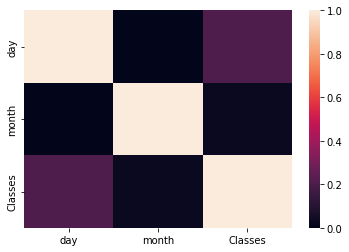

In [29]:
import seaborn as sb
corr = dataset[['day','month','Classes']].corr()
sb.heatmap(corr)

no esta correlada la clase con el mes porque es casi 0 y elimino las columnas de fecha

In [30]:
dataset.drop(['day','month','year'],axis=1,inplace=True)
print(dataset.info())
algerian_forest_dataset = dataset.loc[:, dataset.columns != "Classes"]
X_data_pre = algerian_forest_dataset.values
y_data = dataset.loc[:, dataset.columns == "Classes"].values
X_names_pre = algerian_forest_dataset.columns
print('Collection shape: ', dataset.shape)
print('Algerian shape: ', X_data_pre.shape)
print('CLASS: ', y_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Temp     243 non-null    int64  
 1   RH       243 non-null    int64  
 2   Ws       243 non-null    int64  
 3   Rain     243 non-null    float64
 4   FFMC     243 non-null    float64
 5   DMC      243 non-null    float64
 6   DC       243 non-null    float64
 7   ISI      243 non-null    float64
 8   BUI      243 non-null    float64
 9   FWI      243 non-null    float64
 10  Classes  243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.8 KB
None
Collection shape:  (243, 11)
Algerian shape:  (243, 10)
CLASS:  (243, 1)


In [31]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def removeFeature(X_data, y_data, num_features, X_names_feature, removedFeaturesList):
    model = LogisticRegression(random_state=486).fit(X_data, y_data)
    bestScore = model.score(X_data,y_data)
    bestX_data = np.copy(X_data)
    X_features = np.copy(X_names_feature)

    removedFeature = ''
    for i in range(X_data.shape[1]):
        X_data_aux = np.copy(X_data)
        X_data_reduced = np.delete(X_data_aux, i, 1)
        model = LogisticRegression().fit(X_data_reduced, y_data)
        score = model.score(X_data_reduced, y_data)
        if score > bestScore:
            bestScore = score
            bestX_data = X_data_reduced
            removedFeature = X_names_feature[i]
            X_names_feature_aux = np.copy(X_names_feature)
            X_features = np.delete(X_names_feature_aux, i, 0)

    if removedFeature != '':
        removedFeaturesList.append(removedFeature)
        if len(removedFeaturesList) < num_features:
            return removeFeature(bestX_data, y_data, num_features, X_features, removedFeaturesList)
        else:
            return bestX_data, X_features, removedFeaturesList, bestScore
    else:
        return bestX_data, X_features, removedFeaturesList, bestScore

In [32]:
X_data_result, X_names_result, removedFeatures_result, bestScore = removeFeature(X_data_pre, y_data, 2, X_names_pre, [])
print('Se han eliminado las siguientes {} características: {}'.format(len(removedFeatures_result), removedFeatures_result))
print('Rendimiento obtenido al eliminar las características: {:.3f}'.format(bestScore))
print('Forma del dataset resultante: ', X_data_result.shape)
print('Características finales: ', X_names_result)

Se han eliminado las siguientes 1 características: ['Ws']
Rendimiento obtenido al eliminar las características: 0.996
Forma del dataset resultante:  (243, 9)
Características finales:  ['Temp' 'RH' 'Rain' 'FFMC' 'DMC' 'DC' 'ISI' 'BUI' 'FWI']


Eliminamos la caracteristica WS

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

select2 = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False, random_state=486))
select2.fit(X_data_pre,y_data)
seleccionadas = select2.get_support()
print(X_names_pre[seleccionadas])

Index(['Temp', 'RH', 'Ws', 'FFMC', 'DC', 'FWI'], dtype='object')


In [34]:
X_names = X_names_pre[seleccionadas]
algerian_forest_dataset_final = dataset.loc[:, X_names]
X_data = algerian_forest_dataset_final.values
print(X_data.shape)

(243, 6)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=8, test_size = 0.3, stratify=y_data)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
random_state = [8]
def searchParams(model, params):
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    print("Mejor parámetro: ", grid.best_params_)
    print("Rendimiento en validación cruzada: {:.3f}".format(grid.best_score_))
    print("Rendimiento sobre conjunto de prueba: {:.3f}".format(grid.score(X_test, y_test)))
    pred = grid.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    conf_matix = confusion_matrix(y_test,pred)
    return grid.best_estimator_, round(accuracy, 4), round(f1, 4), conf_matix

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {
    'n_neighbors' : [5, 10, 2, 3],
    'p' : [1,2],
    'weights' : ['distance','uniform']
}
best_model_knn, accuracy_knn, f1_knn, conf_matix_knn = searchParams(KNeighborsClassifier(), param_grid_knn)

Mejor parámetro:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Rendimiento en validación cruzada: 0.947
Rendimiento sobre conjunto de prueba: 0.932


## Árboles de decisión

In [38]:
from sklearn.tree import DecisionTreeClassifier
param_grid_tree = {
    'random_state' : random_state,
    'max_depth' : [10, 3, 6, 8,],
    'min_samples_split' : [5, 10, 2, 15],
    'min_impurity_decrease' : [0.1, 0.001, 1, 0.15]
}
best_model_tree, accuracy_tree, f1_tree, conf_matix_tree = searchParams(DecisionTreeClassifier(), param_grid_tree)

Mejor parámetro:  {'max_depth': 10, 'min_impurity_decrease': 0.1, 'min_samples_split': 5, 'random_state': 8}
Rendimiento en validación cruzada: 0.971
Rendimiento sobre conjunto de prueba: 0.973


In [39]:
#from sklearn.tree import export_graphviz
#from matplotlib import pyplot as plt

#export_graphviz(best_estimator_tree, out_file="algerian_forest_tree.dot", feature_names=X_names, rounded=True, filled=True)

In [40]:
#!dot -Tpng algerian_forest_tree.dot -o algerian_forest_tree.png

In [41]:
#plt.clf()
#image = plt.imread("algerian_forest_tree.png")
#height, width, depth = image.shape
#dpi = 70
#figsize = width / float(dpi), height / float(dpi)
#plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
#plt.axis('off')
#plt.imshow(image)
#plt.show()

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'random_state' : random_state,
    'n_estimators' : [3, 5, 9, 15, 30],
    'max_depth' : [10, 3, 6, 8,],
}
best_model_rf, accuracy_rf, f1_rf, conf_matix_rf = searchParams(RandomForestClassifier(), param_grid_rf)

Mejor parámetro:  {'max_depth': 10, 'n_estimators': 5, 'random_state': 8}
Rendimiento en validación cruzada: 0.976
Rendimiento sobre conjunto de prueba: 0.945


### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gb = {
    'random_state' : random_state,
    'n_estimators' : [3, 5, 9, 15, 30],
    'max_depth' : [10, 3, 6, 8,],
}
best_model_gb, accuracy_gb, f1_gb, conf_matix_gb = searchParams(GradientBoostingClassifier(), param_grid_gb)

Mejor parámetro:  {'max_depth': 10, 'n_estimators': 3, 'random_state': 8}
Rendimiento en validación cruzada: 0.965
Rendimiento sobre conjunto de prueba: 0.973


## NaiveBayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
param_grid_nb = {
    'alpha': [0.0001,0.001, 0.01,0.1, 1, 10,100,200]
}
best_model_nb, accuracy_nb, f1_nb, conf_matix_nb = searchParams(MultinomialNB(), param_grid_nb)

Mejor parámetro:  {'alpha': 0.0001}
Rendimiento en validación cruzada: 0.882
Rendimiento sobre conjunto de prueba: 0.822


## Modelos lineales
### Regresión logística

In [45]:
from sklearn.linear_model import LogisticRegression
param_grid_rl = {
    'random_state' : random_state,
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1','l2']
}
best_model_rl, accuracy_rl, f1_rl, conf_matix_rl = searchParams(LogisticRegression(), param_grid_rl)

Mejor parámetro:  {'C': 100, 'penalty': 'l2', 'random_state': 8}
Rendimiento en validación cruzada: 0.959
Rendimiento sobre conjunto de prueba: 0.945


### Modelos lineales SVC

In [46]:
from sklearn.svm import LinearSVC
param_grid_lsvc = {
    'random_state' : random_state,
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1','l2']
}
best_model_lsvc, accuracy_lsvc, f1_lsvc, conf_matix_lsvc = searchParams(LinearSVC(), param_grid_lsvc)

Mejor parámetro:  {'C': 100, 'penalty': 'l2', 'random_state': 8}
Rendimiento en validación cruzada: 0.959
Rendimiento sobre conjunto de prueba: 0.945


## Redes neuronales

In [47]:
from sklearn.neural_network import MLPClassifier
param_grid_nn = {
    'random_state' : random_state,
    'solver': ['sgd','lbfgs'],
    'alpha': [0.0001,0.001, 0.01,0.1, 1, 10,100,200]
}
best_model_nn, accuracy_nn, f1_nn, conf_matix_nn = searchParams(MLPClassifier(), param_grid_nn)

Mejor parámetro:  {'alpha': 0.01, 'random_state': 8, 'solver': 'lbfgs'}
Rendimiento en validación cruzada: 0.965
Rendimiento sobre conjunto de prueba: 0.932


In [50]:
metrics = {
    "accuracy": [accuracy_knn, accuracy_tree, accuracy_rf, accuracy_gb, accuracy_nb, accuracy_rl, accuracy_lsvc, accuracy_nn],
    "f1" : [f1_knn, f1_tree, f1_rf, f1_gb, f1_nb, f1_rl, f1_lsvc, f1_nn],
    #"matriz de confusión" : [conf_matix_knn, conf_matix_tree, conf_matix_rf, conf_matix_gb, conf_matix_nb, conf_matix_rl, conf_matix_lsvc, conf_matix_nn]
}
print ("{:<10} {:<10} {:<10} {:<18} {:<18} {:<15} {:<20} {:<15} {:<15}".format('Métria','KNN','Árboles','Random Forest','Gradient boosting', 'Naive Bayes', 'Regresión logística', 'Lineal SVC', 'Redes neuronales'))
for key, value in metrics.items():
    knn, tree, rf, gb, nb, rl, lsvc, nn = value
    if key != "matriz de confusión":
        print("{:<10} {:<10} {:<10} {:<18} {:<18} {:<15} {:<20} {:<15} {:<15}".format(key, knn, tree, rf, gb, nb, rl, lsvc, nn))
    else:
        print(knn, tree, rf, gb, nb, rl, lsvc, nn)

Métria     KNN        Árboles    Random Forest      Gradient boosting  Naive Bayes     Regresión logística  Lineal SVC      Redes neuronales
accuracy   0.9315     0.9726     0.9452             0.9726             0.8219          0.9452               0.9452          0.9315         
f1         0.9412     0.9762     0.9512             0.9762             0.8571          0.9512               0.9512          0.9383         
[[28  4]
 [ 1 40]] [[30  2]
 [ 0 41]] [[30  2]
 [ 2 39]] [[30  2]
 [ 0 41]] [[21 11]
 [ 2 39]] [[30  2]
 [ 2 39]] [[30  2]
 [ 2 39]] [[30  2]
 [ 3 38]]


Validacion cruzada - ya se hace en grid search
Conjunto de validacion - no lo uso porque son mjuy pocos datos